# TOPICS SENTIMENT ANALYSIS 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

ytbr = "camilaloures"
path = f"../data/{ytbr}/"
img_path = f"{path}imgs/"

## code

In [6]:
current = "all_communities"
df = pd.read_csv(f"{path}topics_sentiment_{current}.csv").drop(['Unnamed: 0'], axis=1)
# df.head()
# df.info()

In [7]:
sentiment_counts = df['sentiment'].value_counts()

avg_scores_per_community = df.groupby('community')['sentiment_score'].mean().reset_index()

sentiment_counts_per_community = df.groupby('community')['sentiment'].value_counts().unstack(fill_value=0)

print("**Sentiment Counts (Across All Communities):**")
print(sentiment_counts)

# print("\n**Average Sentiment Scores per Community:**")
# print(avg_scores_per_community)

print("\n**Sentiment Counts per Community (for Detailed Insight):**")
print(sentiment_counts_per_community)

**Sentiment Counts (Across All Communities):**
sentiment
neutral     7277
positive    5028
negative    4258
Name: count, dtype: int64

**Sentiment Counts per Community (for Detailed Insight):**
sentiment  negative  neutral  positive
community                             
0              1739     2806      2745
1               440      950       225
2               455      646       518
3               492     1087       215
4               279      556       265
5                43      128        48
6               810     1104      1012


<Figure size 2000x1200 with 0 Axes>

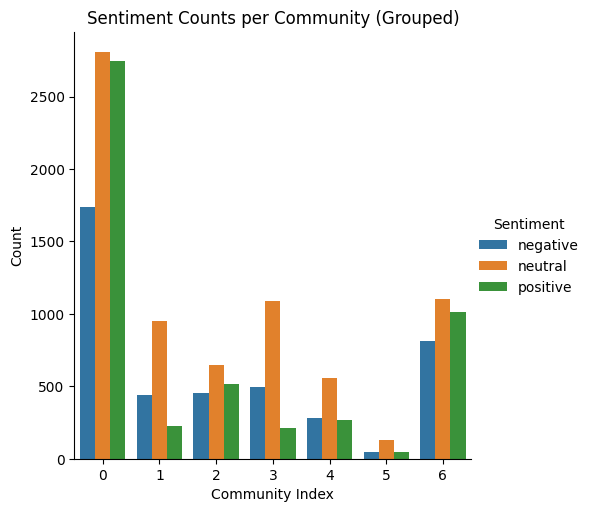

In [8]:
# Melt the DataFrame for seaborn's catplot
plot_df = sentiment_counts_per_community.reset_index().melt(id_vars='community', var_name='Sentiment', value_name='Count')
# plot_df = plot_df[plot_df["community"].isin([12,1,11,7,2])]

# Plotting
plt.figure(figsize=(20, 12))
sns.catplot(x='community', y='Count', hue='Sentiment', data=plot_df, kind='bar')
plt.title('Sentiment Counts per Community (Grouped)')
plt.xlabel('Community Index')
plt.ylabel('Count')
# plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.tight_layout()
# plt.show()
plt.savefig(f"{img_path}sentiment_counts_per_community_{current}.png")

## Word Cloud

In [3]:
def plot_word_cloud(text, title, save=False, _path=""):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    if save:
        plt.savefig(f"{_path}")
    plt.show()

In [70]:
# positive_text = " ".join(str(positive_df['comment_text_cleaned']))
negative_text = " ".join(negative_df['comment_text_cleaned'])
neutral_text = " ".join(neutral_df['comment_text_cleaned'])

# plot_word_cloud(positive_text, 'Positive Comments Word Cloud', True, f"{img_path}positive_comments.png" )
# plot_word_cloud(negative_text, 'Negative Comments Word Cloud', True, f"{img_path}negative_comments.png" )

## Words 

In [30]:
# df[df["community"] == 6]

In [ ]:
# positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
negative_df = negative_df[negative_df["community"].isin([12])]
# neutral_df  = df[df['sentiment'] == 'neutral']

mnc_df = negative_df[negative_df["sentiment_score"] >= 0.8].sort_values(by="sentiment_score", ascending=False)
mnc_df

In [17]:
mnc_df.drop(columns=["comment_id","comment_like_count","comment_reply_count", "is_reply", 
                    "parent_comment_id", "topics", "topic_proba", "topic_sentiment"]).to_csv(f"{path}metrics/most_negative_comments.csv")

In [15]:
def plot_most_topics(df: pd.DataFrame,sentiment="negative", sentiment_threshold: float = 0.8):
    negative_comments = df[(df['sentiment'] == sentiment) & (df['sentiment_score'] >= sentiment_threshold)]
    
    topic_negative_counts = negative_comments.groupby('topics').size().reset_index(name='negative_count')

    topic_negative_counts = topic_negative_counts.merge(df[['topics', 'name', 'Representation']].drop_duplicates(), on='topics')
    
    topic_negative_counts = topic_negative_counts[~topic_negative_counts['name'].str.startswith('-1')]

    topic_negative_counts = topic_negative_counts.sort_values(by='negative_count', ascending=False)
    
    topic_negative_counts["name"] = topic_negative_counts["name"].str.replace(r'^\d+_', '', regex=True).str.replace('_', ',')

    plt.figure(figsize=(10, 6))
    color = "Reds_r" if sentiment == "positive" else "Greens_r"
    sns.barplot(data=topic_negative_counts.head(10), x='negative_count', y='name', palette='Reds_r')
    
    plt.title(f'Top 10 Most Negative Topics (Sentiment Score >= {sentiment_threshold*100}%)', fontsize=14)
    plt.xlabel('Number of Negative Comments', fontsize=12)
    plt.ylabel('Topic Name', fontsize=12)
    plt.show()


In [ ]:
plot_most_topics(negative_df[negative_df["community"]  == 9],"negative", sentiment_threshold=0.8)

In [8]:
def plot_most_frequent_topics(df: pd.DataFrame, top_n: int = 10):
    """
    Plots the top N most frequent topics in the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'topics' column.
    - top_n (int, optional): Number of top topics to display. Defaults to 10.
    """
    
    topic_freq = df['topics'].value_counts().reset_index()
    topic_freq.columns = ['topics', 'freq_count']
    
    if 'name' in df.columns:
        topic_freq = topic_freq.merge(df[['topics', 'name']].drop_duplicates(), on='topics')
        topic_freq = topic_freq[~topic_freq['name'].str.startswith('-1')]
        topic_freq["name"] = topic_freq["name"].str.replace(r'^\d+_', '', regex=True).str.replace('_', ',')
        display_column = 'name'
    else:
        display_column = 'topics'
    
    topic_freq = topic_freq.sort_values(by='freq_count', ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=topic_freq, x='freq_count', y=display_column)
    
    plt.title(f'Top {top_n} Most Frequent Topics', fontsize=14)
    plt.xlabel('Frequency Count', fontsize=12)
    plt.ylabel('Topic', fontsize=12)
    plt.show()


In [ ]:
plot_most_frequent_topics(df[df["community"].isin([4,1])])

In [33]:
df[df["community"].isin([5,6])].drop(columns=["comment_id","comment_like_count","comment_reply_count", "is_reply", 
                    "parent_comment_id", "topics", "topic_proba", "topic_sentiment"]).to_csv(f"{path}metrics/comments_community_5_6.csv")